# 🌡️ 연도별 7월 폭염 데이터 분석 실습

이 노트북은 여러 연도의 7월 폭염 데이터를 바탕으로 **연도별 평균 최고기온의 변화**를 분석하는 실습 예제입니다.

## ✅ 실습 목표
- 폭염 관련 `.csv` 데이터를 연도별로 통합한다.
- `pandas`로 날짜 데이터를 처리하고 연도별로 그룹화한다.
- `matplotlib`을 이용해 시계열 그래프로 시각화한다.

---

## 🔧 Step 1. 라이브러리 불러오기

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트 설정 (NanumGothic)
plt.rc('font', family='NanumGothic')

# 마이너스 기호 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False



## 📂 Step 2. 데이터 파일 불러오기 및 연도 통합

In [15]:
# 변환된 폭염 CSV 파일 리스트
file_paths = [
    "heatwave_2021_07.csv",
    "heatwave_2022_07.csv",
    "heatwave_2023_07.csv",
    "heatwave_2024_07.csv",
    "heatwave_2025_07.csv"
]

# 연도별 통합 데이터프레임 생성
combined_df = pd.DataFrame()

for path in file_paths:
    df = pd.read_csv(path, encoding="utf-8-sig")
    df.columns = df.columns.str.strip()  # 공백 제거
    if '일시' in df.columns:
        df['일시'] = pd.to_datetime(df['일시'], errors='coerce')
        df['연도'] = df['일시'].dt.year
        combined_df = pd.concat([combined_df, df], ignore_index=True)

combined_df.head() # 5개의 연도별 데이터셋 csv 파일을 통합하여 dataframe 으로 변환 후 앞부분만 출력

,일시,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%),폭염특보(O/X),폭염영향예보(단계),열대야(O/X),자외선지수(단계),연도
0,2021-07-01,북강릉(104),X,28.1,26.4,21.8,18.1,86.8,X,,X,높음,2021
1,2021-07-01,동해(106),X,27.4,25.2,21.9,19.1,90.0,X,,X,매우높음,2021
2,2021-07-01,서울(108),X,31.3,31.0,26.3,21.4,70.9,O,관심,X,매우높음,2021
3,2021-07-01,인천(112),X,29.9,29.3,25.6,21.8,67.9,X,관심,X,매우높음,2021
4,2021-07-01,원주(114),X,31.0,31.3,25.0,19.0,70.0,X,관심,X,높음,2021


## 📊 Step 3. 연도별 평균 최고기온 계산

In [16]:
# 최고기온 열이 존재하는지 확인하고 평균 계산
if '최고기온(°C)' in combined_df.columns:
    grouped = combined_df.groupby('연도')['최고기온(°C)'].mean().reset_index() #연도별 7월 최고기온 열의 평균값 계산
else:
    print("⚠️ '최고기온(°C)' 열이 존재하지 않습니다.")
grouped.head() # 계산된 dataframe의 앞부분만 출력
'''
  출력해보면, 2025년이 제일 덥네요 정말...
'''

'\n  출력해보면, 2025년이 제일 덥네요 정말...\n'

## 📈 Step 4. 시계열 그래프 시각화

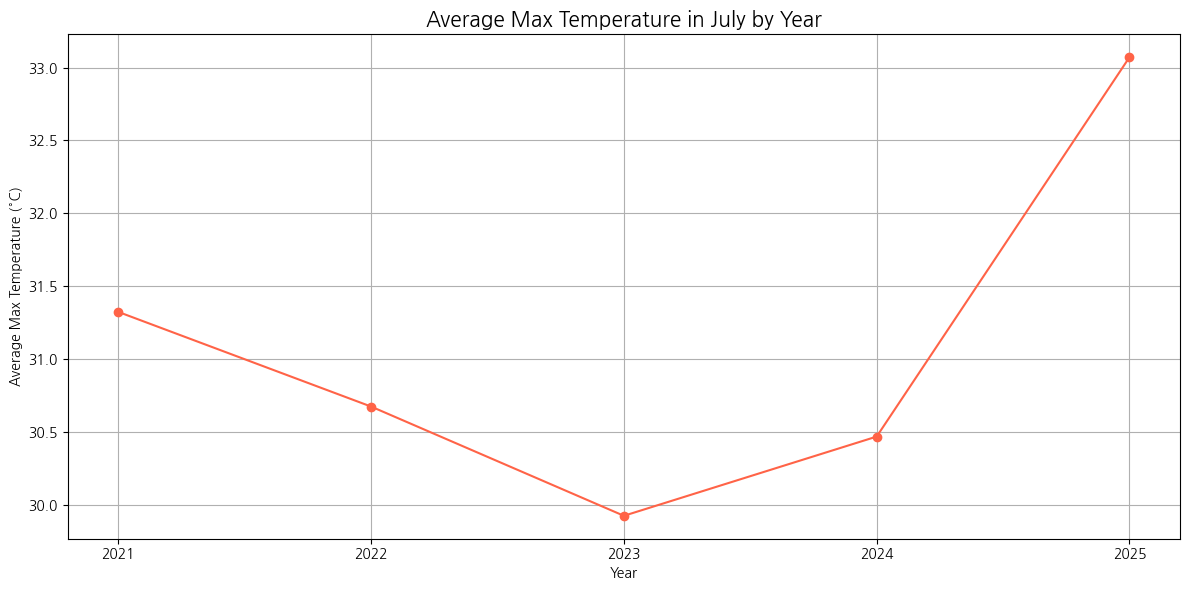

In [17]:
# 연도별 평균 최고기온 시각화 (영문 버전)
plt.figure(figsize=(12, 6))
plt.plot(grouped['연도'], grouped['최고기온(°C)'], marker='o', color='tomato')
plt.title("Average Max Temperature in July by Year", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Average Max Temperature (°C)")
plt.xticks(range(2021, 2026))
plt.grid(True)
plt.tight_layout()
plt.show()



## 🔍 추가 탐구 과제
- 폭염 여부(`폭염여부(O/X)`)가 'O'인 날의 개수를 연도별로 비교해보세요.
- 열대야 발생 여부(`열대야(O/X)`)의 빈도를 연도별로 확인해보세요.
- `폭염특보(O/X)` 비율이나 `자외선지수(단계)`의 평균 등도 함께 분석할 수 있습니다.

In [18]:
# 필수 컬럼 존재 확인
need_cols = ['연도','폭염여부(O/X)','열대야(O/X)','폭염특보(O/X)','자외선지수(단계)']
missing = [c for c in need_cols if c not in combined_df.columns]
if missing:
    raise ValueError(f"누락된 컬럼: {missing}")

# 1) O/X → 1/0 변환 함수
def ox_to_int(s):
    return s.astype(str).str.strip().map({'O':1,'X':0})

# 2) 자외선지수(단계) → 숫자 등급(낮음=1, 보통=2, 높음=3, 매우높음=4)
uv_map = {'낮음':1,'보통':2,'높음':3,'매우높음':4}
combined_df['자외선지수_등급'] = (
    combined_df['자외선지수(단계)'].astype(str).str.strip().map(uv_map)
)

# 3) O/X 수치 컬럼 추가
combined_df['폭염_수치']   = ox_to_int(combined_df['폭염여부(O/X)'])
combined_df['열대야_수치'] = ox_to_int(combined_df['열대야(O/X)'])
combined_df['특보_수치']   = ox_to_int(combined_df['폭염특보(O/X)'])

,총일수,폭염_O일수,폭염_O비율(%)
연도,,,
2021,5022,2376,47.3
2022,5022,1314,26.2
2023,5022,1151,22.9
2024,5983,1838,30.7
2025,2702,1350,50.0


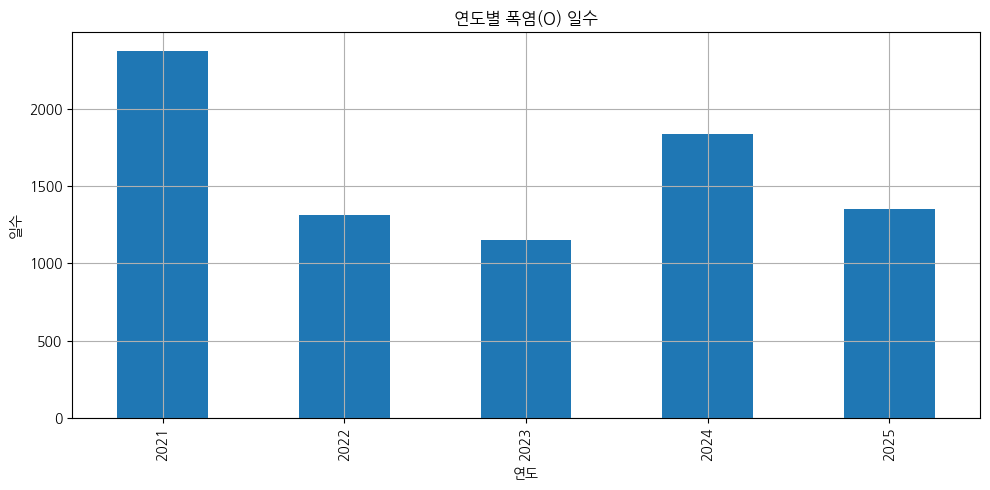

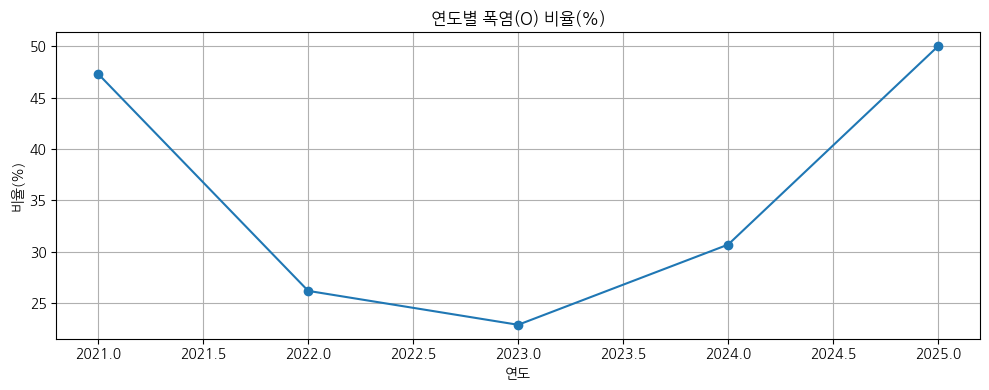

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 총 관측일수(연도별)
tot_days = combined_df.groupby('연도').size().rename('총일수')

# O일수(연도별)
heatwave_days = combined_df.groupby('연도')['폭염_수치'].sum().rename('폭염_O일수')

# 합치고 비율 계산
heatwave_stat = pd.concat([tot_days, heatwave_days], axis=1)
heatwave_stat['폭염_O비율(%)'] = (heatwave_stat['폭염_O일수'] / heatwave_stat['총일수'] * 100).round(1)
display(heatwave_stat)

# 시각화(막대: O일수, 선: O비율)
plt.figure(figsize=(10,5))
heatwave_stat['폭염_O일수'].plot(kind='bar')
plt.title('연도별 폭염(O) 일수')
plt.xlabel('연도'); plt.ylabel('일수')
plt.grid(True); plt.tight_layout(); plt.show()

plt.figure(figsize=(10,4))
heatwave_stat['폭염_O비율(%)'].plot(marker='o')
plt.title('연도별 폭염(O) 비율(%)')
plt.xlabel('연도'); plt.ylabel('비율(%)')
plt.grid(True); plt.tight_layout(); plt.show()


,총일수,열대야_O일수,열대야_O비율(%)
연도,,,
2021,5022,491,9.8
2022,5022,550,11.0
2023,5022,333,6.6
2024,5983,1777,29.7
2025,2702,506,18.7


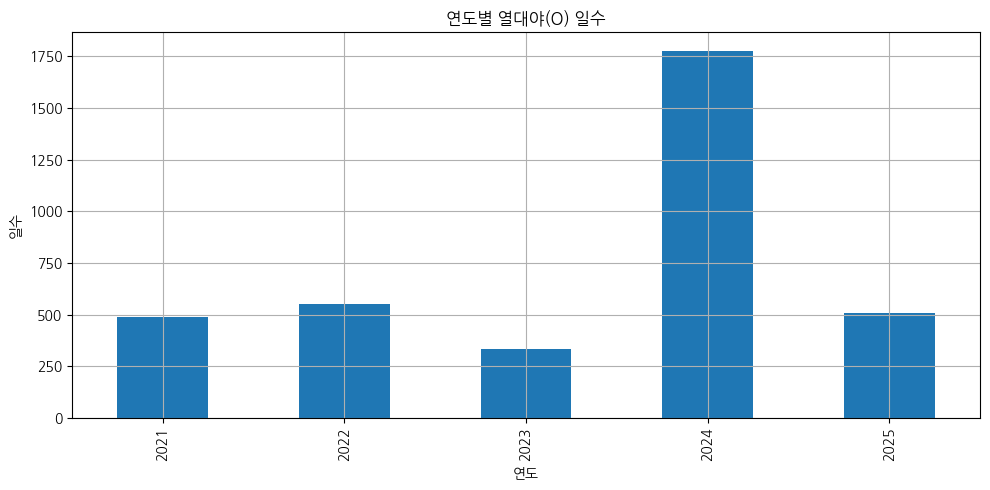

In [20]:
# 연도별 열대야 O일수
tropical_nights = combined_df.groupby('연도')['열대야_수치'].sum().rename('열대야_O일수')

# 합치고 비율도 같이 구해보기
tropical_stat = pd.concat([tot_days, tropical_nights], axis=1)
tropical_stat['열대야_O비율(%)'] = (tropical_stat['열대야_O일수']/tropical_stat['총일수']*100).round(1)
display(tropical_stat)

# 시각화
plt.figure(figsize=(10,5))
tropical_stat['열대야_O일수'].plot(kind='bar')
plt.title('연도별 열대야(O) 일수')
plt.xlabel('연도'); plt.ylabel('일수')
plt.grid(True); plt.tight_layout(); plt.show()


,폭염특보_O비율(%),UV_평균등급,UV_가장흔한단계
연도,,,
2021,69.5,3.30,매우높음
2022,56.6,3.23,매우높음
2023,45.6,2.67,매우높음
2024,49.9,1.00,낮음
2025,87.5,1.00,낮음


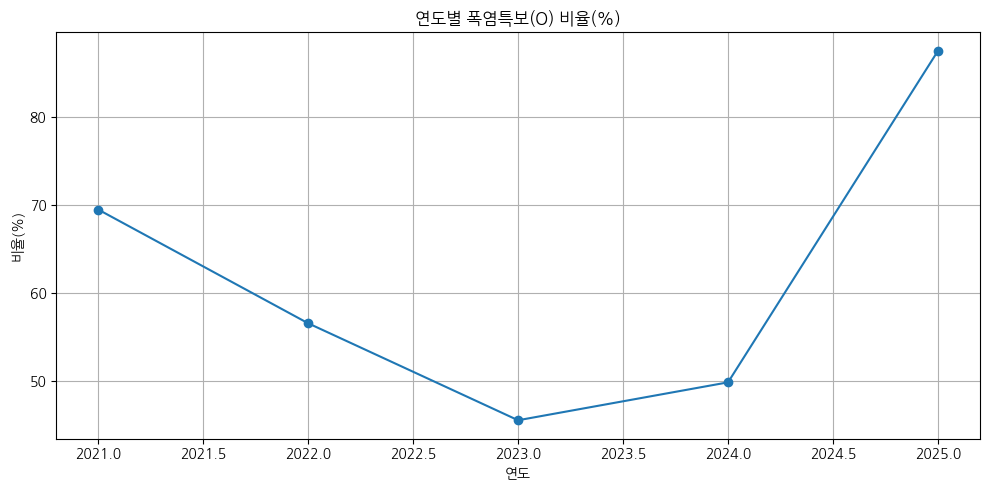

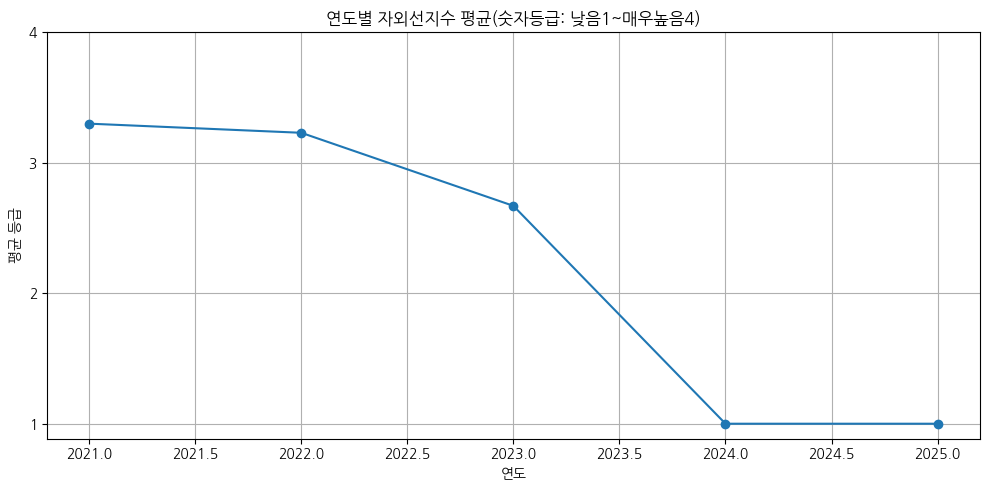

In [21]:
# 특보 비율(연도별)
advisory_rate = (
    combined_df.groupby('연도')['특보_수치']
    .mean().mul(100).round(1)
    .rename('폭염특보_O비율(%)')
)

# 자외선지수 평균(숫자등급)과 범주형 가장 흔한 값(모드)
uv_avg = combined_df.groupby('연도')['자외선지수_등급'].mean().round(2).rename('UV_평균등급')
uv_mode = (
    combined_df.groupby('연도')['자외선지수(단계)']
    .agg(lambda s: s.mode().iat[0] if not s.mode().empty else None)
    .rename('UV_가장흔한단계')
)

uv_stat = pd.concat([advisory_rate, uv_avg, uv_mode], axis=1)
display(uv_stat)

# 시각화
plt.figure(figsize=(10,5))
advisory_rate.plot(marker='o')
plt.title('연도별 폭염특보(O) 비율(%)')
plt.xlabel('연도'); plt.ylabel('비율(%)')
plt.grid(True); plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
uv_avg.plot(marker='o')
plt.title('연도별 자외선지수 평균(숫자등급: 낮음1~매우높음4)')
plt.xlabel('연도'); plt.ylabel('평균 등급')
plt.yticks([1,2,3,4])
plt.grid(True); plt.tight_layout(); plt.show()
